# Ch `09`: Concept `02`

## Convolutions and maxpool

Load the CIFAR-10 images, and define helper functions to visualize the convolutions and weights:

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cifar_tools
import tensorflow as tf

names, data, labels = \
    cifar_tools.read_data('./cifar-10-batches-py')


def show_conv_results(data, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(data)[3]):
        img = data[0, :, :, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()


def show_weights(W, filename=None):
    plt.figure()
    rows, cols = 4, 8
    for i in range(np.shape(W)[3]):
        img = W[:, :, 0, i]
        plt.subplot(rows, cols, i + 1)
        plt.imshow(img, cmap='Greys_r', interpolation='none')
        plt.axis('off')
    if filename:
        plt.savefig(filename)
    else:
        plt.show()

('names', ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck'])
((50000, 3072), (50000,))


Let's start with a an example image:

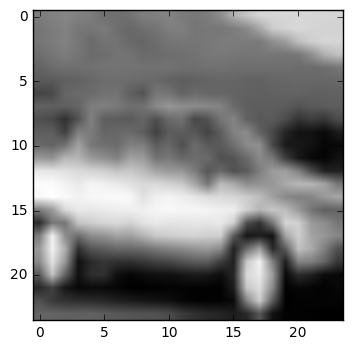

In [10]:
raw_data = data[4, :]
raw_img = np.reshape(raw_data, (24, 24))
plt.figure()
plt.imshow(raw_img, cmap='Greys_r')
plt.show()

Define the TensorFlow ops:

In [12]:
x = tf.reshape(raw_data, shape=[-1, 24, 24, 1])
W = tf.Variable(tf.random_normal([5, 5, 1, 32]))
b = tf.Variable(tf.random_normal([32]))

conv = tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')
conv_with_b = tf.nn.bias_add(conv, b)
conv_out = tf.nn.relu(conv_with_b)

k = 2
maxpool = tf.nn.max_pool(conv_out, ksize=[1, k, k, 1], strides=[1, k, k, 1], padding='SAME')

Visualize the effects of running the convolution and maxpool ops:

weights:


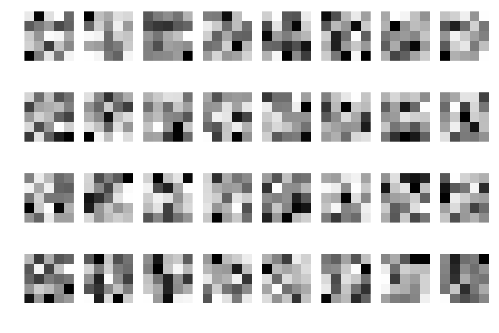

convolution results:
(1, 24, 24, 32)


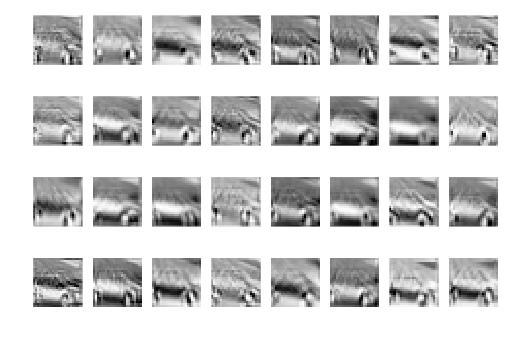

convolution with bias and relu:
(1, 24, 24, 32)


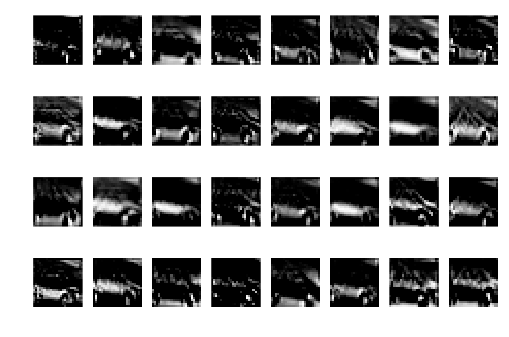

maxpool after all the convolutions:
(1, 12, 12, 32)


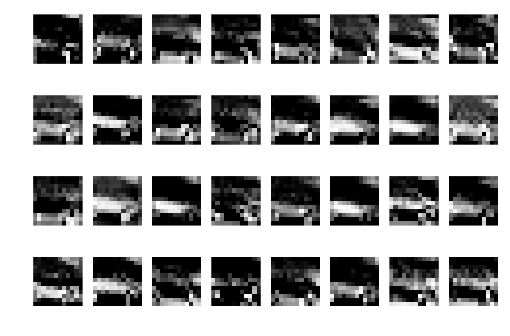

In [14]:
with tf.Session() as sess:
    sess.run(tf.initialize_all_variables())

    W_val = sess.run(W)
    print('weights:')
    show_weights(W_val)

    conv_val = sess.run(conv)
    print('convolution results:')
    print(np.shape(conv_val))
    show_conv_results(conv_val)
    

    conv_out_val = sess.run(conv_out)
    print('convolution with bias and relu:')
    print(np.shape(conv_out_val))
    show_conv_results(conv_out_val)


    maxpool_val = sess.run(maxpool)
    print('maxpool after all the convolutions:')
    print(np.shape(maxpool_val))
    show_conv_results(maxpool_val)